<a href="https://colab.research.google.com/github/FaithKare/Unsupervised-Learning-in-R-Supermarket-data-analysis-/blob/master/Anomaly_Detection_Part_4_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining The Question

## a) Specifying the analysis question
Carrefour Kenya requires information for the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax)

More specifically the objctive of this analysis is fraud detection. 

## b) Metric of Success
The metric of succes of this analysis would be being able to identify the anomalies in the sales dataset.

## c) Understanding the Context
As a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). The project has been divided into four parts where we’ll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on our insights.

## d) Experimental Design

Data Importing

Data Checking

Anomaly Detection

# Data Importing

In [1]:
#loading & preview the data
data <- read.csv("/content/Supermarket_Sales_Forecasting - Sales.csv")
head(data)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


# Checking the data

In [2]:
#Checking for missing values 
colSums(is.na(data))

# there are no missing values 

Date Sales 
    0     0

In [3]:
#check for duplicates
duplicates <- data[duplicated(data), ]
#view duplicated records
duplicates

# there are no duplicated rows in the data 


Date,Sales
<chr>,<dbl>


In [5]:
# Change col to Date format
data$Date <- as.Date(data$Date,format = "%m/%d/%Y")

#order by date
data <- dplyr::arrange(data, Date)

In [6]:
#load library
library(tibble)

#convert dataframe to tibble format
data <- as_tibble(data)

# checking the class to confirm conversion 
class(data)


[1] "tbl_df"     "tbl"        "data.frame"

In [7]:
#view new tibble
head(data)


Date,Sales
<date>,<dbl>
2019-01-01,457.443
2019-01-01,399.756
2019-01-01,470.673
2019-01-01,388.290
2019-01-01,132.762
2019-01-01,132.027


# Anomaly Detection 

In [8]:
# Installing anomalize package 
install.packages("anomalize")

# Load tidyverse and anomalize
library(tidyverse)
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

══ Us

In [10]:
library(tibbletime)

#convert to tibble time
data <- as_tbl_time(data, index = Date)

#detecting anomalies
data_anomalized <- data %>%
as_period("daily") %>%
time_decompose(Sales) %>%
anomalize(remainder) %>%
time_recompose()

frequency = 7 days

trend = 30 days

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [11]:
#view summary
data_anomalized %>% glimpse()

Rows: 89
Columns: 10
$ Date          <date> 2019-01-01, 2019-01-02, 2019-01-03, 2019-01-04, 2019-01…
$ observed      <dbl> 457.4430, 44.5935, 367.5525, 75.7785, 548.9715, 939.5400…
$ season        <dbl> 71.60220, -137.93561, -32.93877, -73.88690, -17.91742, 1…
$ trend         <dbl> 296.3521, 298.8125, 301.2728, 303.7331, 307.0337, 310.33…
$ remainder     <dbl> 89.488658, -116.283358, 99.218460, -154.067738, 259.8551…
$ remainder_l1  <dbl> -1131.823, -1131.823, -1131.823, -1131.823, -1131.823, -…
$ remainder_l2  <dbl> 1168.64, 1168.64, 1168.64, 1168.64, 1168.64, 1168.64, 11…
$ anomaly       <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", "N…
$ recomposed_l1 <dbl> -763.8688, -970.9462, -863.4891, -901.9769, -842.7068, -…
$ recomposed_l2 <dbl> 1536.594, 1329.517, 1436.974, 1398.486, 1457.756, 1582.0…


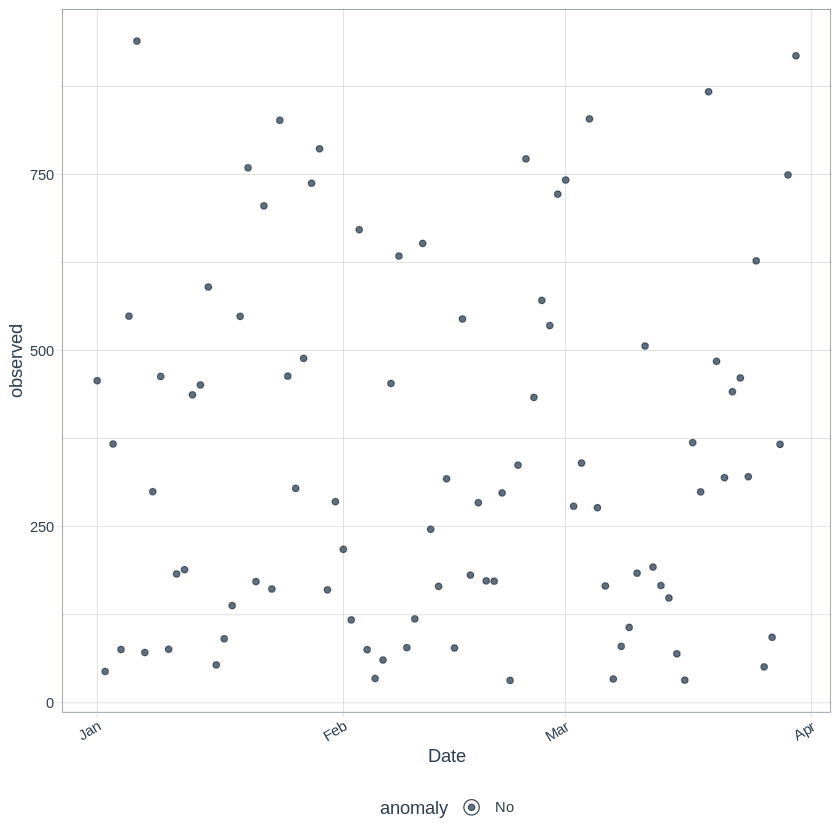

In [12]:
#plot of anomalies
data_anomalized %>% plot_anomalies(ncol = 3, alpha_dots = 0.75)

With the default parameters the dataset shows no anomalies.


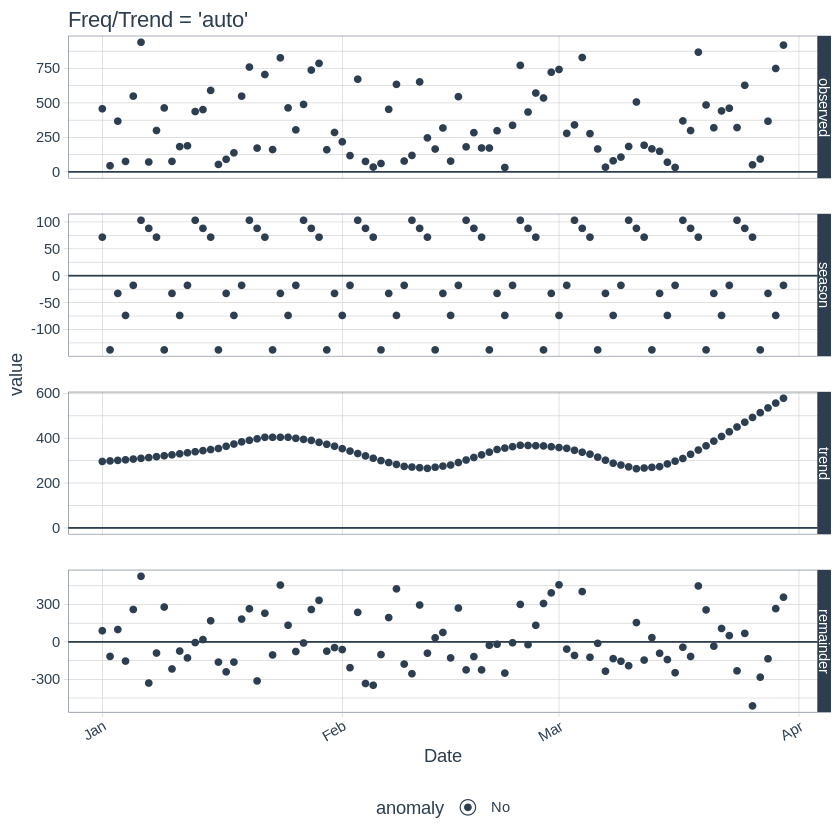

In [13]:
#We can visualize this decomposition(with defaults) using plot_anomaly_decomposition().
anom1 <- data_anomalized %>%
plot_anomaly_decomposition() +
ggtitle("Freq/Trend = 'auto'")
anom1

In [14]:
#we adjust trend = “2 weeks”/"14 days" which makes for a quite overfit trend.
anom2 <- data %>%
as_period("daily") %>%
time_decompose(Sales,
frequency = "auto",
trend = "14 days") %>%
anomalize(remainder) %>%
plot_anomaly_decomposition() +
ggtitle("Trend = 2 Weeks (Local)")

frequency = 7 days

trend = 14 days



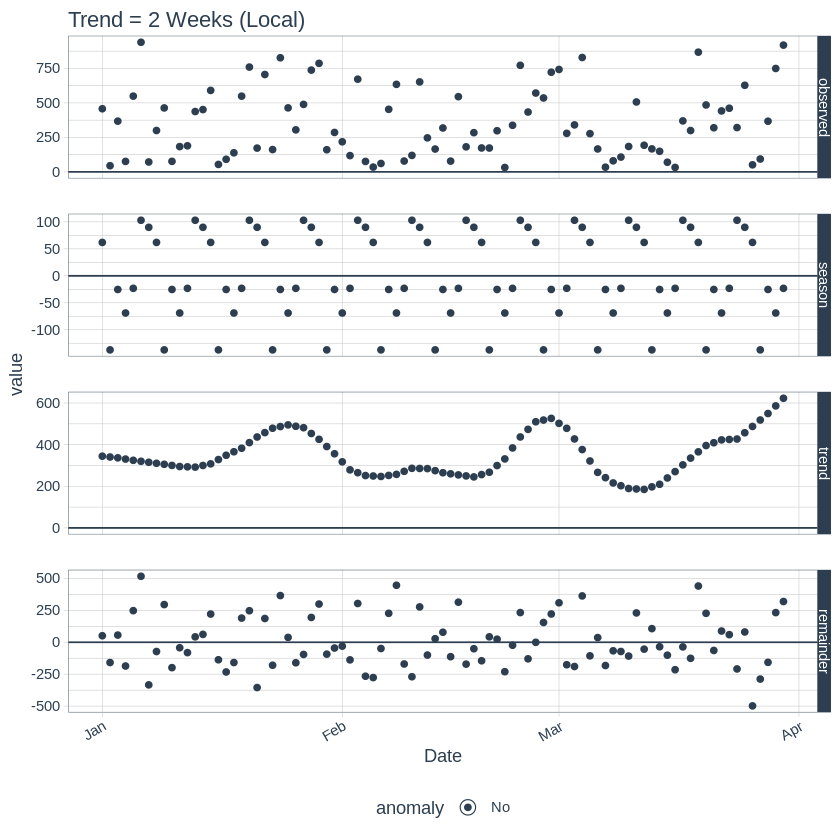

In [15]:
# visualize the two week trend 
anom2

In [17]:
#We can adjust alpha, which is set to 0.05 by default. By default, the bands just cover the outside of the range.
anom_alpha <- data %>%
as_period("daily") %>%
time_decompose(Sales) %>%
anomalize(remainder, alpha = 0.05, max_anoms = 0.2) %>%
time_recompose() %>%
plot_anomalies(time_recomposed = TRUE) +
ggtitle("alpha = 0.05")

frequency = 7 days

trend = 30 days



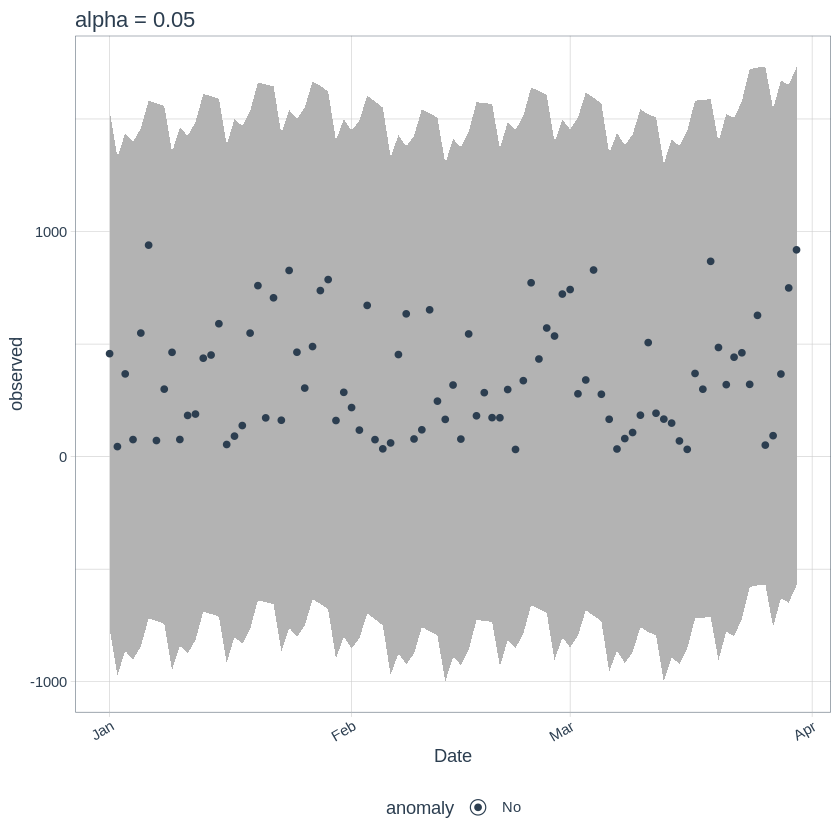

In [18]:
#view range of normal values
anom_alpha

In [20]:
#We can adjust alpha to 0.2, the bands cover a narrower range.
#Max Anoms The max_anoms parameter is used to control the maximum percentage of data that can
#be an anomaly

anom_alpha_adj <- data %>%
as_period("daily") %>%
time_decompose(Sales) %>%
anomalize(remainder, alpha = 0.2, max_anoms = 0.2) %>%
time_recompose() %>%
plot_anomalies(time_recomposed = TRUE) +
ggtitle("alpha = 0.2")

frequency = 7 days

trend = 30 days



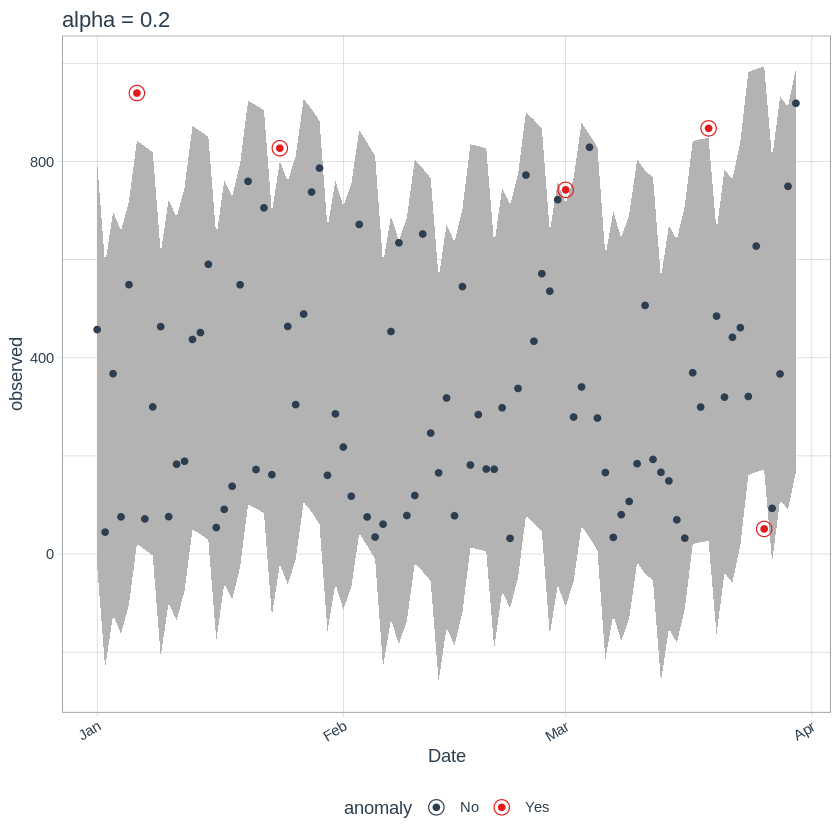

In [21]:
#view range of normal values
anom_alpha_adj


When we adjust alpha to 0.2 then the range for normal values is reduced and some points are now tagged
as outliers. The default of 0.05 is usually reasonable but for purposes of showing the effect of alpha we used
0.2 to see the response.

In [23]:
#extract the anomolous points
#Using alpha = 0.2, to get some anomalies
anom_alpha_adj <- data %>%
as_period("daily") %>%
time_decompose(Sales) %>%
anomalize(remainder, alpha = 0.2, max_anoms = 0.2) %>%
time_recompose() %>%
filter(anomaly == 'Yes')

frequency = 7 days

trend = 30 days



In [24]:
#anomalies present can be viewed:
anom_alpha_adj

Date,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2019-01-06,939.5400,103.06006,310.3344,526.1456,-392.3886,429.2054,Yes,21.00586,842.5998
2019-01-24,827.0850,-32.93877,404.3524,455.6713,-392.3886,429.2054,Yes,-20.97488,800.6191
2019-03-01,742.2975,-73.88690,358.5293,457.6551,-392.3886,429.2054,Yes,-107.74617,713.8478
2019-03-19,867.6150,71.60220,347.3403,448.6725,-392.3886,429.2054,Yes,26.55394,848.1479
2019-03-26,51.1455,71.60220,492.8143,-513.2710,-392.3886,429.2054,Yes,172.02793,993.6219


In [27]:
#5 anomolous transactions
#convert to df
anom_df <- data.frame(anom_alpha_adj)
#view df
anom_df[,c(1:2,8)]

Date,observed,anomaly
<date>,<dbl>,<chr>
2019-01-06,939.5400,Yes
2019-01-24,827.0850,Yes
2019-03-01,742.2975,Yes
2019-03-19,867.6150,Yes
2019-03-26,51.1455,Yes


In conclusion, the dataset does not appear to have any extreme transactions that can be considered anomalies
and thus fraud. After adjusting some parameters (alpha=0.2) we observed 5 transactions that were now
considered anomalies. With this in mind we can say that though there aren’t obvious anomalies it may
be prudent to look into the 5 transactions which are close to being considered obvious anomalies. The 5
transactions are as shown above.